# **Lab3 : Photo Mosaic using KNN Clustering**

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from sklearn.cluster import KMeans

from scipy import spatial

from tqdm import tqdm
import cv2
import os
import random

## Feature Preparation for tile images

Locate the directory containing your tile images dataset. Ensure that the images in this directory have a wide range of colors to create a visually appealing mosaic. List all the image filenames in the directory to `fnames`. ***Select a subset of these filenames to use as tile images, with at least 100 images in total, and assign them to `fnames_mini`.***

In [47]:
### START CODE HERE ###
from google.colab import drive

# Mount the drive (adjust the path as necessary)
drive.mount('/content/drive')

# Directory containing your tile images (update this path to your image directory)
image_dir = '/content/drive/MyDrive/ImageColab/Lab3_Image-Clustering/playlist-image100pic'
fnames = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

numImg = len(fnames)
if numImg >= 100:
    fnames_mini = fnames[:100]
else:
    raise ValueError("Less than 100 images")
print(fnames_mini)
### END CODE HERE ###

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['IMG_2835.jpg', 'IMG_2831.jpg', 'Avatar.jpg', 'IMG_2824.jpg', 'IMG_2825.jpg', 'Genshin Impact.jpg', 'IMG_2816.jpg', 'IMG_2834.jpg', 'IMG_2812.jpg', 'IMG_2830.jpg', 'IMG_2821.jpg', 'IMG_2817.jpg', 'IMG_2810.jpg', 'IMG_2820.jpg', 'IMG_2809.jpg', 'IMG_2836.jpg', 'IMG_2814.jpg', 'IMG_2818.jpg', 'IMG_2833.jpg', 'IMG_2811.jpg', 'IMG_2822.jpg', 'IMG_2826.jpg', 'IMG_2815.jpg', 'IMG_2819.jpg', 'IMG_2802.jpg', 'Gqct_Ida.jpg', 'IMG_2832.jpg', 'IMG_2795.jpg', 'IMG_2789.jpg', 'IMG_2790.jpg', 'gojo satoru.jpg', 'Frieren and Himmel.jpg', 'IMG_2785.jpg', 'IMG_2797.jpg', 'JGKr8LJN.jpg', 'IMG_2798.jpg', 'IMG_2801.jpg', 'IMG_2805.jpg', '𝒫𝒾𝓍𝑒𝓁 𝒫𝒶𝓇𝒶𝒹𝒾𝓈𝑒 76.jpg', 'IMG_2799.jpg', '☆.jpg', 'JtGAKud_.jpg', 'IMG_2792.jpg', 'IMG_2791.jpg', 'IMG_2788.jpg', 'IMG_2807.jpg', 'IMG_2803.jpg', 'Frieren │ Sousou no Frieren │ 葬送のフリーレン.jpg', 'XpMRfLxE.jpg', 'IMG_2804.jpg', 'Ellen(1).jpg', 'IMG_

In [3]:
assert len(fnames_mini) >= 100, "Less than 100 images found in the subset. Ensure the directory has at least 100 images."

### Loading and Resizing Tile Images
Define the size to which all tile images will be resized. This ensures consistency in the dimensions of the tile images.
Iterate over the list of tile image filenames. Resize the image to the predefined `tile_size`. Append the processed image to the list of `tiles`.


In [58]:
### START CODE HERE ###
from PIL import Image
tiles = []
tile_size = (50,50)
for i in fnames_mini:
  image_path = os.path.join(image_dir, i)
  with Image.open(image_path) as img:
        img_resized = img.resize(tile_size)
        tiles.append(img_resized)
### END CODE HERE ###

In [5]:
assert len(tiles) == len(fnames_mini), "The number of processed images does not match the number of filenames. Ensure all images are loaded and processed correctly."

Randomly select a few tile images from your dataset and display them using Matplotlib. This will help you visually inspect the tile images to ensure they are loaded and processed correctly.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/1.png)
</details>

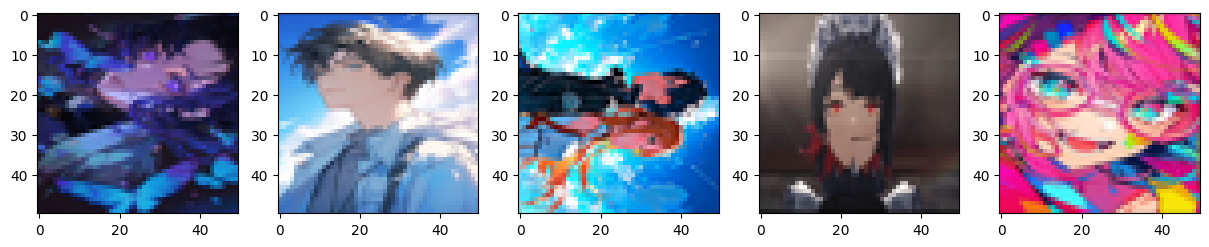

In [59]:
### START CODE HERE ###
number_pic = 5
if isinstance(tiles, list) and len(tiles) >= number_pic:
    random_tiles = random.sample(tiles, number_pic)

fig, ax = plt.subplots(1, number_pic, figsize=(15,15))

for i, tiles in enumerate(random_tiles):
   ax[i].imshow(tiles)
plt.show()

### END CODE HERE ###

Calculate the average color for each tile image and add the resulting mean color to the `colors` list.

In [60]:
### START CODE HERE ###
colors = []
for i, tiles in enumerate(random_tiles):
    tile_array = np.array(tiles)
    avg_color_per_tile = np.average(tile_array, axis=(0,1))
    colors.append(avg_color_per_tile)
print(f"Calculated colors for {len(colors)} tiles.")
print(type(colors[0]))
print(colors[1].shape)
print(colors[0])
print(colors[1])
print(colors[2])
print(colors[3])
print(colors[4])
avg = np.average(colors[0])
print(f'Test for avarage (color[0]) = {avg}')
### END CODE HERE ###

Calculated colors for 5 tiles.
<class 'numpy.ndarray'>
(3,)
[ 51.152   59.9184 107.4192]
[135.0356 157.786  189.9324]
[ 71.6744 132.694  173.9368]
[85.5356 74.424  74.5504]
[183.2096 103.5564 139.9048]
Test for avarage (color[0]) = 72.82986666666666


Create a visual representation of the mean colors calculated for each tile image.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- Example output where `numImg = 10`

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/2-1.png)

- Example output where `numImg = 500`

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/2-2.png)
</details>

The average color is: [0.20059608 0.23497412 0.42125176]
51.152
59.9184
107.4192
The average color is: [0.52955137 0.61876863 0.74483294]
135.0356
157.786
189.9324
The average color is: [0.28107608 0.52036863 0.6821051 ]
71.6744
132.694
173.9368
The average color is: [0.33543373 0.29185882 0.29235451]
85.5356
74.424
74.5504
The average color is: [0.71846902 0.40610353 0.54864627]
183.2096
103.5564
139.9048


<ipython-input-61-c4bb6531183a>:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((0, 0), 1, 1, color=average_color, edgecolor='white')


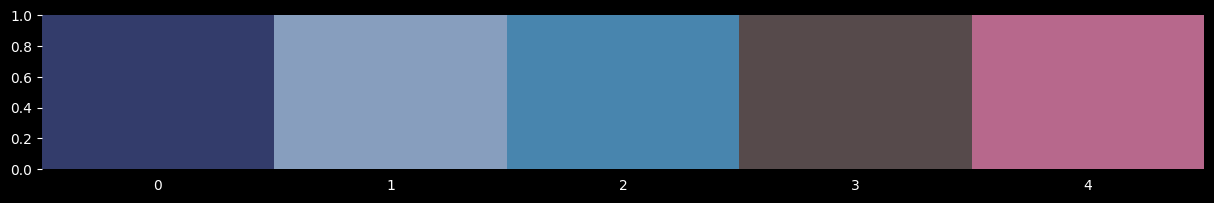

In [61]:
### START CODE HERE ###
from matplotlib.patches import Rectangle
meancolor_list =[ ]

fig, ax = plt.subplots(1, len(colors) ,figsize=(15, 2))
fig.patch.set_facecolor('black')
for i in range(len(colors)):
    redChannel = colors[i][0]
    BlueChannel = colors[i][1]
    greenChannel = colors[i][2]
    average_color = np.array([redChannel, BlueChannel, greenChannel]) / 255
    meancolor_list.append(average_color)
    # Print the average color
    print("The average color is:", average_color )
    print(redChannel)
    print(BlueChannel)
    print(greenChannel)
    rect = Rectangle((0, 0), 1, 1, color=average_color, edgecolor='white')
    ax[i].add_patch(rect)
    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 1)
   # set x in center
    ax[i].set_xticks([0.5])
    ax[i].set_xticklabels([str(i)], color='white')
   # Remove y-axis ticks
    if i == 0:
      ax[i].tick_params(axis='y', colors='white')  # Set color of y-axis ticks to white
    else:
      ax[i].set_yticks([])
    ax[i].spines['top'].set_color('none')
    ax[i].spines['right'].set_color('none')
    ax[i].spines['left'].set_color('none')
    ax[i].spines['bottom'].set_color('none')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
### END CODE HERE ###

## Preparation for main image

Load the main image.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/3.png)

</details>

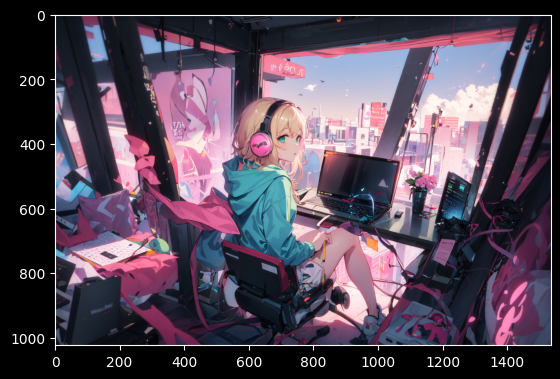

In [41]:
### START CODE HERE ###
image_dir = '/content/drive/MyDrive/ImageColab/Lab3_Image-Clustering/playlist-image100pic/7f291d2207f694b75332e6ee36aa59da.png'
img_main = cv2.imread(image_dir)
og_img = cv2.cvtColor(img_main, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

main_img = og_img.copy()
plt.imshow(og_img)
### END CODE HERE ###

Compute the number of tiles required in the height and width dimensions of the image. This is based on the size of each tile and the dimensions of the original image. Define the dimensions for the resized image grid.

In [122]:
### START CODE HERE ###
height ,width, _ = og_img.shape
dim = (width,height)
print(height)
print(width)
print(og_img.shape)
### END CODE HERE ###

1024
1536
(1024, 1536, 3)


Visualize the resized image to ensure proper alignment with the tile grid.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/4.png)

</details>

(1024, 1536, 3)


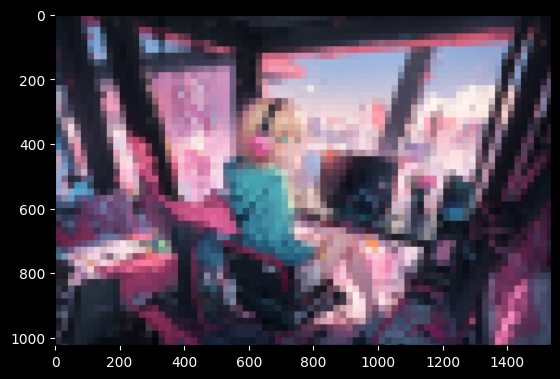

In [87]:
### START CODE HERE ###
tile_size = 20
resize_img = cv2.resize(og_img, dim, interpolation=cv2.INTER_AREA)
mosaic_img = np.zeros_like(resize_img)
for i in range(0, height, tile_size):
    for j in range(0, width, tile_size):
        tile = resize_img[i : i + tile_size, j : j + tile_size]
        avg_color = tile.mean(axis=(0, 1))
        mosaic_img[i : i + tile_size, j : j + tile_size] = avg_color
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
plt.imshow(mosaic_img)
print(mosaic_img.shape)
plt.show()
### END CODE HERE ###

Create a KDTree from the list of mean colors of the tile images using [`spatial.KDTree()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html). Use `closest_tiles` to store the index of the closest tile image for each pixel in the resized main image.
***Try with difference value of k in `tree.query()`***

In [88]:
from scipy.spatial import KDTree
### START CODE HERE ###
tile_colors = [color / 255 for color in colors]
tree = KDTree(tile_colors)
closest_tiles = np.zeros((height, width), dtype=int)
for i in range(height):
    for j in range(width):
        pixel_color = resize_img[i, j] / 255
        _, index = tree.query(pixel_color)
        closest_tiles[i, j] = index


### END CODE HERE ###

In [90]:
assert closest_tiles.shape == (height, width), "The shape of the closest_tiles array does not match the expected dimensions."

Visualizing `closest_tiles` Indices
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/5.png)

</details>

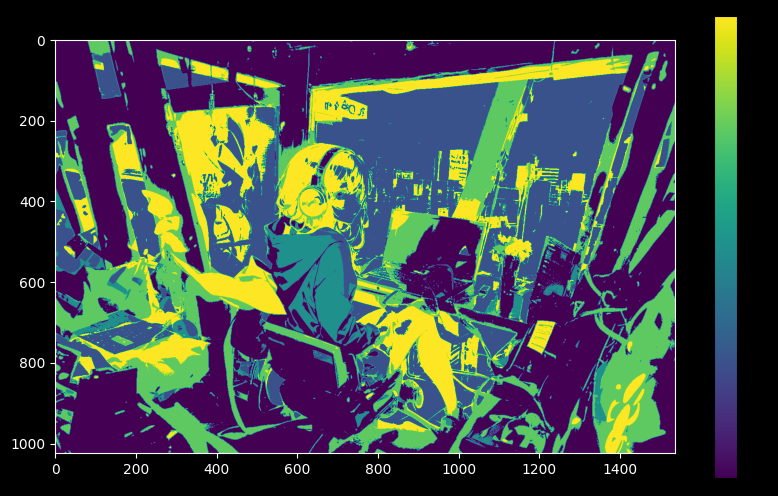

In [105]:
### START CODE HERE ###

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.imshow(closest_tiles, cmap='viridis')
plt.colorbar()
plt.title('Closest Tiles')
plt.show()


### END CODE HERE ###

Create a copy of the resized main image and replace each pixel region with the corresponding tile image based on the closest tile indices to assemble the final photo mosaic.

In [135]:
### START CODE HERE ###
tile_dir = '/content/drive/MyDrive/ImageColab/Lab3_Image-Clustering/playlist-image100pic'
tile_size = 10
tiles = []

for filename in os.listdir(tile_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        tile_path = os.path.join(tile_dir, filename)
        tile_img = Image.open(tile_path)
        tile_img = tile_img.resize((tile_size, tile_size))
        tiles.append(np.array(tile_img))

tiles = np.array(tiles)
tile_colors = [tile.mean(axis=(0, 1)) for tile in tiles]


output = np.zeros((height, width, 3), dtype=np.uint8)
# Accessing size correctly from the first tile
tile_h, tile_w = tiles[0].shape[:2]

main_image_path = '/content/drive/MyDrive/ImageColab/Lab3_Image-Clustering/playlist-image100pic/7f291d2207f694b75332e6ee36aa59da.png'
main_img = Image.open(main_image_path)
main_img = main_img.resize((width, height))
main_img = np.array(main_img)

def closest_tile_index(color, tile_colors):
    distances = np.linalg.norm(tile_colors - color, axis=1)
    return np.argmin(distances)

for i in range(0, height, tile_h):
    for j in range(0, width, tile_w):
        region = main_img[i:i+tile_h, j:j+tile_w]
        region_color = region.mean(axis=(0, 1))
        tile_idx = closest_tile_index(region_color, tile_colors)
        tile = tiles[tile_idx]

        # size boundaries
        end_i = min(i + tile_h, height)
        end_j = min(j + tile_w, width)
        output[i:end_i, j:end_j] = tile[:end_i - i, :end_j - j]


### END CODE HERE ###

Create a side-by-side comparison of four images: the original image, the resized main image, the final mosaic, and the KDTree tile index grid. This helps visualize the mosaic creation process.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/6.png)

</details>

<Figure size 1000x600 with 0 Axes>

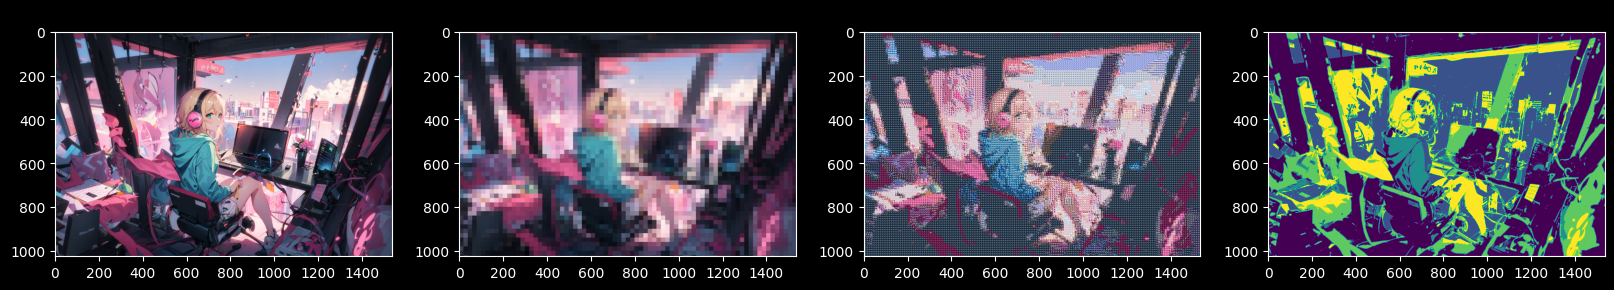

In [136]:
### START CODE HERE ###
plt.figure(figsize=(10, 6))

fig, axs = plt.subplots(1, 4, figsize=(20, 10))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.tick_params(axis='y', colors='white')
    ax.tick_params(axis='x', colors='white')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
axs[0].imshow(main_img)
axs[0].set_title('Original Image')

axs[1].imshow(mosaic_img)
axs[1].set_title('Main image feature')

axs[2].imshow(output)
axs[2].set_title('Mosaic')

axs[3].imshow(closest_tiles, cmap='viridis')
axs[3].set_title('KDTree Return Tile Index ')
plt.show()


### END CODE HERE ###

## Save the final photo mosaic
Experiment with at least 3 different values of k and save the final photo.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- Saved output should resemble this, but not be identical

![image.gif](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab3_Image-Clustering/asset/7.gif?raw=true)


- k = 1

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/output-k1.png)

- k = 10

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/output-k10.png)

- k = 50

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab3_Image-Clustering/asset/output-k50.png)
</details>

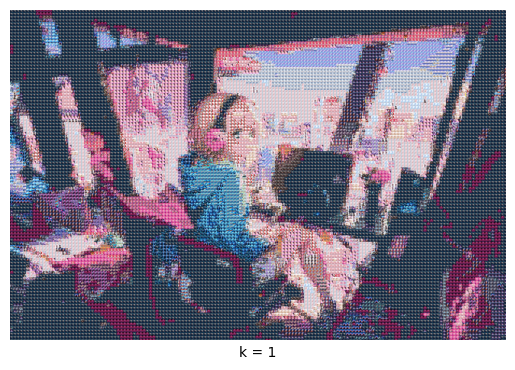

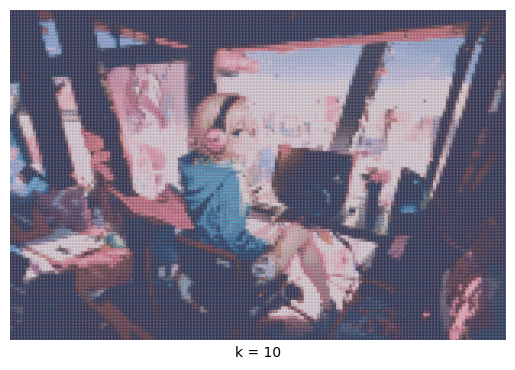

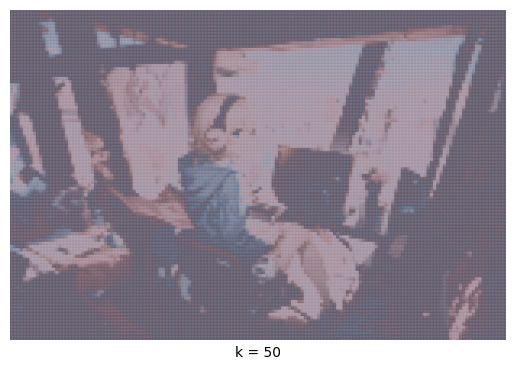

In [147]:
### START CODE HERE ###
from sklearn.neighbors import NearestNeighbors

def load_tiles(tile_dir, tile_size):
    tiles = []
    for filename in os.listdir(tile_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            tile_path = os.path.join(tile_dir, filename)
            tile_img = Image.open(tile_path)
            tile_img = tile_img.resize((tile_size, tile_size))
            tiles.append(np.array(tile_img))
    tiles = np.array(tiles)
    tile_colors = [tile.mean(axis=(0, 1)) for tile in tiles]
    return tiles, tile_colors

def closest_tile_index(color, tile_colors):
    distances = np.linalg.norm(tile_colors - color, axis=1)
    return np.argmin(distances)

def create_mosaic(main_img, tiles, tile_colors, k, output_path):
    tile_h, tile_w = tiles[0].shape[:2]
    height, width = main_img.shape[:2]
    output = np.zeros((height, width, 3), dtype=np.uint8)

    # Create KDTree for tile matching
    neighbors = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(tile_colors)

    for i in range(0, height, tile_h):
        for j in range(0, width, tile_w):
            region = main_img[i:i+tile_h, j:j+tile_w]
            region_color = region.mean(axis=(0, 1)).reshape(1, -1)
            distances, indices = neighbors.kneighbors(region_color)

            # average tile based on nearest neighbors
            selected_tiles = tiles[indices[0]]
            average_tile = np.mean(selected_tiles, axis=0).astype(np.uint8)

            # size boundaries
            end_i = min(i + tile_h, height)
            end_j = min(j + tile_w, width)
            output[i:end_i, j:end_j] = average_tile[:end_i - i, :end_j - j]

    # display result
    plt.xlabel(f'k = {k}')
    plt.xticks([])
    plt.yticks([])
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.imshow(output)
    plt.show()

    output_image = Image.fromarray(output)
    output_image.save(output_path)


if __name__ == "__main__":
    tile_dir = '/content/drive/MyDrive/ImageColab/Lab3_Image-Clustering/playlist-image100pic'
    main_image_path = '/content/drive/MyDrive/ImageColab/Lab3_Image-Clustering/playlist-image100pic/7f291d2207f694b75332e6ee36aa59da.png'
    output_dir = '/content'
    tile_size = 10
    k_values = [1, 10, 50]

    main_img = Image.open(main_image_path)
    width, height = main_img.size
    main_img = main_img.resize((width, height))
    main_img = np.array(main_img)

    # tile colors
    tiles, tile_colors = load_tiles(tile_dir, tile_size)

    for k in k_values:
        output_path = os.path.join(output_dir, f'mosaic_k{k}.png')
        create_mosaic(main_img, tiles, tile_colors, k, output_path)

### END CODE HERE ###

---

## **Question**
1. How does changing the size of the tiles influence the overall quality and appearance of the mosaic? Conduct an analysis comparing two different tile sizes and discuss the trade-offs involved in terms of computational complexity and visual fidelity.
2. Explain the effect of changing the value of K (number of nearest neighbors) on the mosaic image.